<a href="https://colab.research.google.com/github/weathon/healthy-diet/blob/MachineLearning/food.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import tensorflow as tf
import numpy as np
import pandas as pd
from PIL import Image
import pylab

In [2]:
# # Re-download the data.zip, run as needed
# !touch ~/.ssh/known_hosts
# !scp -o PreferredAuthentications="password" -o StrictHostKeyChecking=no wg25r@files.weasoft.com:/mnt/blockstorage/user/data.zip data.zip
# !unzip data.zip
!wget files.weasoft.com:9999/foodDataset.zip

--2023-01-01 06:17:21--  http://files.weasoft.com:9999/foodDataset.zip
Resolving files.weasoft.com (files.weasoft.com)... 66.42.65.160
Connecting to files.weasoft.com (files.weasoft.com)|66.42.65.160|:9999... connected.
HTTP request sent, awaiting response... 200 OK
Length: 247780120 (236M) [application/zip]
Saving to: ‘foodDataset.zip’

foodDataset.zip     100%[===================>] 236.30M  18.5MB/s    in 14s     

2023-01-01 06:17:35 (16.7 MB/s) - ‘foodDataset.zip’ saved [247780120/247780120]



In [ ]:
!unzip foodDataset.zip

### Load Data

In [15]:
X = []
Y = []
labs = ['Pizza',
 'Rice',
 'Burger',
 'Oranges',
 'Apple']
for i in labs:
   for j in os.listdir(f"food dataset/{i}/"):
     X.append(np.array(Image.open(f"food dataset/{i}/{j}").resize((128,128))))
     Y.append(i)

In [16]:
Y_mapping = {}
l = 0
for i in range(len(Y)):
    try:
        tmp = Y_mapping[Y[i]]
        Y[i] = tmp
    except:
        Y_mapping[Y[i]] = l
        Y[i] = l
        l+=1

In [17]:
for i in range(len(Y)):
    tmp = np.zeros_like([0]*(l+1))
    tmp[Y[i]] = 1
    Y[i] = tmp

In [18]:
len(Y[0])

6

### Model

In [49]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(128,128,3)),
    tf.keras.layers.Conv2D(32,(3,3),activation="relu"),
    tf.keras.layers.Conv2D(32,(3,3),activation="relu"),
    tf.keras.layers.Conv2D(64,(3,3),activation="relu"),
    # tf.keras.layers.Conv2D(64,(3,3),activation="relu"),
    tf.keras.layers.MaxPooling2D(),
    # tf.keras.layers.Conv2D(64,(3,3),activation="relu"),
    tf.keras.layers.Conv2D(128,(3,3),activation="relu"),
    # tf.keras.layers.Conv2D(128,(3,3),activation="relu"), works much better without these layers 
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(128,(3,3),activation="relu"),
    tf.keras.layers.Conv2D(128,(3,3),activation="relu"),
    tf.keras.layers.MaxPooling2D(),
    # tf.keras.layers.Dense(4096, activation="relu"),
    # tf.keras.layers.Dense(2048, activation="relu"),
    # tf.keras.applications.efficientnet_v2.EfficientNetV2L(include_top=0, input_shape=(128,128,3)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.8),
    # tf.keras.layers.Dense(2048*2, activation="relu"),
    # tf.keras.layers.Dense(2048, activation="relu"),
    tf.keras.layers.Dense(1024, activation="relu"),
    tf.keras.layers.Dense(512, activation="relu"),
    tf.keras.layers.Dense(128, activation="relu"),
    # tf.keras.layers.Dense(len(Y_mapping.keys())+1, activation="relu"),
    tf.keras.layers.Dense(len(Y_mapping.keys())+1, activation="softmax")
])

In [50]:
# model.build(input_shape=(128,128,3))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 126, 126, 32)      896       
                                                                 
 conv2d_23 (Conv2D)          (None, 124, 124, 32)      9248      
                                                                 
 conv2d_24 (Conv2D)          (None, 122, 122, 64)      18496     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 61, 61, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 59, 59, 128)       73856     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 29, 29, 128)      0         
 g2D)                                                 

In [51]:
X = np.array(X)
Y = np.array(Y)
model.compile(optimizer='adam', loss='categorical_crossentropy',  metrics="accuracy")

In [52]:
random = np.arange(len(Y)) 
np.random.shuffle(random)
X = X[random]
Y = Y[random]
history = model.fit(X, Y, epochs=10, validation_split=0.05)
# more layers 50->60->75!71 kunyunexkunfarekunchouwei 8 whycleankunyunex

Epoch 1/10
159/159 [==============================] - 13s 74ms/step - loss: 1.9054 - accuracy: 0.5246 - val_loss: 1.1076 - val_accuracy: 0.5993
Epoch 2/10
159/159 [==============================] - 11s 70ms/step - loss: 0.9546 - accuracy: 0.6481 - val_loss: 1.0680 - val_accuracy: 0.6742
Epoch 3/10
159/159 [==============================] - 11s 70ms/step - loss: 0.8349 - accuracy: 0.7020 - val_loss: 0.7969 - val_accuracy: 0.7678
Epoch 4/10
159/159 [==============================] - 11s 70ms/step - loss: 0.7325 - accuracy: 0.7338 - val_loss: 0.7054 - val_accuracy: 0.7566
Epoch 5/10
159/159 [==============================] - 11s 69ms/step - loss: 0.6620 - accuracy: 0.7636 - val_loss: 0.7398 - val_accuracy: 0.7865
Epoch 6/10
159/159 [==============================] - 11s 70ms/step - loss: 0.6267 - accuracy: 0.7695 - val_loss: 0.6631 - val_accuracy: 0.7828
Epoch 7/10
159/159 [==============================] - 11s 71ms/step - loss: 0.5714 - accuracy: 0.7936 - val_loss: 0.5832 - val_accuracy:

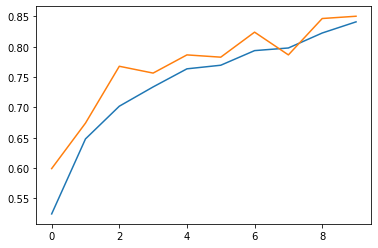

In [54]:
pylab.plot(history.history['accuracy'])
pylab.plot(history.history['val_accuracy'])

In [55]:
model.save("final_model.h5")

In [57]:
!ls -l -h final_model.h5

-rw-r--r-- 1 root root 228M Jan  1 06:55 final_model.h5


In [58]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [59]:
!cp final_model.h5 drive/MyDrive/final_model.h5

In [60]:
reverseMap = {}
for i in Y_mapping.keys():
  reverseMap[Y_mapping[i]] = i

1/1 [==============================] - 0s 16ms/step
Rice


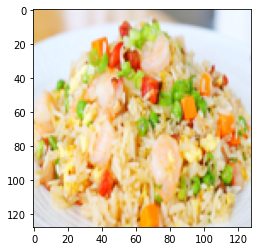

In [63]:
id = 100
name = "id13323708-Zhang-Zhou-Fried-Rice-YT1.jpeg"
print(reverseMap[np.argmax(model.predict(np.array([
    np.array(Image.open(name).resize((128,128)))
    ]))[0][:-1])])#aaput kes in predict
pylab.imshow(Image.open(name).resize((128,128)))


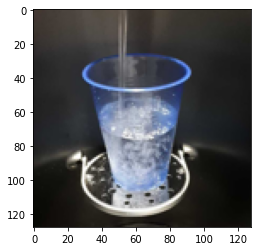